#                                EDMONTON AIR QUALITY PREDICTION

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## INTRODUCTION:
In order to address the air pollution levels, the scope of our project is to predict Edmonton's air quality.  By accurately predicting air quality, we can provide valuable information to citizens, policymakers, and stakeholders, enabling them to take proactive measures to mitigate pollution and its adverse effects. ​

Our project, leverage machine learning techniques and historical air quality data to create a reliable predictive model, aiming to promote sustainable urban living in Edmonton.

## AQI (Air Quality Health Index)

The Air Quality Health Index (AQI) is used to measure and report air quality in Edmonton, Canada. The AQHI is a scale from 1 to 10+, with higher values indicating poorer air quality and greater potential health risks.

The AQHI in Edmonton is calculated based on the concentration levels of three pollutants: ground-level ozone (O3), fine particulate matter (PM2.5), and nitrogen dioxide (NO2). The calculation takes into account the health effects of each pollutant and weights them according to their relative importance.

To calculate the AQHI, the concentration levels of each pollutant are first measured and reported in micrograms per cubic meter (µg/m³). The measured values are then converted into an AQHI value using the following equation:

AQHI = (1/3)(AQHIozone + AQHIpm2.5 + AQHIno2)


Once the AQHI values for each pollutant are calculated, they are averaged together to produce a single AQHI value for the area. The resulting AQHI value is then reported to the public through various channels, including local news media, government websites, and mobile applications.

### <li>1- DATA SAMPLING AND COLLECTION:

When working with air quality data, it is important to ensure that the data has been collected and sampled properly to ensure its accuracy and reliability. We evaluate the quality of the data sampling and collection in the dataset by following:

<li>Checked the data source: Ensure that the data is from a reputable source, such as a government agency or a recognized research institution.

<li>Check the sampling frequency: It is important to ensure that the data has been collected at a sufficient frequency to capture variations in air quality over time. Ideally, this data is collected continuously on daily bases.

<li>Check the sampling location: The sampling location is representative of the area being monitored. The location chosen based on factors such as proximity to pollution sources, wind patterns, and topography.

<li>Check the sampling method: The sampling is appropriate for the pollutants being monitored as measuring of pollutants is taken care as some require continuous monitoring, while others can be measured through periodic sampling.<br>

####  All the above points have be taken into account when we include following datasets:

##### <li> Air quality data for the years 2015, 2016, 2017, and 2018 for the City of Edmonton(City of Edmonton Open Data portal)
https://data.edmonton.ca/Environmental-Services/Edmonton-Area-Air-Quality-Readings-Historical-/44dx-d5qn
##### <li> Weather data - (2015-2019-Government Data)
https://climate.weather.gc.ca/historical_data/search_historic_data_e.html
##### <li>Wildfire data - (2015-2018- Government Data)
https://www.alberta.ca/wildfire-maps-and-data.aspx
##### <li>Traffic data - (2015-2018 - City of Edmonton Traffic Data)
https://www.edmonton.ca/transportation/traffic_reports/traffic-volumes-turning-movements
##### <li>Hourly reading - (2015-2018 - Government Data)
https://airdata.alberta.ca/reporting/Download/MultipleParameters
##### <li>Communities AQHI - ( April 3, 2022 to April 2, 2023 - Govermnet Data) 
https://airquality.alberta.ca/map


#### <li> Loading  Air Quality data for years 2015, 2016, 2017 and 2018 for City of Edmonton:

In [270]:
df_2015 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2015.csv")
df_2016 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2016.csv")
df_2017 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2017.csv")
df_2018 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2018.csv")

### <li>2- DATA CLEANING AND PREPARATION:

Cleaning, handling missing values, removing duplicates, and correcting data entry errors.

###  Data Preparation: 

- Originally have a dataset of 2015 ~ 2019 daily AQI (Edmonton Area Air Quality Readings.csv) and other relative parameters for the 3 weather monitoring stations that in Edmonton.
- There were missing values in 2019 data. Therefore we splited the data by years from 2015 to 2018.
- Combine All the datasets(2015, 2016, 2017, 2018) 
- Pivoting the combined dataframe
- Saved with Final_Data.csv

Edmonton_Area_Air_Quality_Readings (2015 to 2018) file:
- This dataset is characterized by daily and different parameter measured at specfic monitoring stations.
- Each station has precise spatial information, such as latitude, longitude, and Geo Location.
- Each parameter measured has its own units, like Nitric Oxide (ppm), Outdoor Air Temperature (deg c), Std. Dev. of Wind Speed (km/hr 10m), Ethylene (ug/m3), etc.

In [271]:
df_2015.sample(3)

,Row ID,Monitoring Station Name,Parameter Measured,Average Daily Value,Unit of Measure,Date Measured,Latitude,Longitude,Geo Location
21145,Bruderheim-2015-04-02-Nitrogen Dioxide-0.0026,Bruderheim,Nitrogen Dioxide,0.0026,ppm,"Apr 02, 2015",53.799988,-112.927818,POINT (-112.9278183 53.7999878)
75484,Tomahawk-2015-10-26-Total Oxides Of Nitrogen-0...,Tomahawk,Total Oxides Of Nitrogen,0.0039,ppm,"Oct 26, 2015",53.372436,-114.768629,POINT (-114.7686293 53.3724355)
69690,Genesee-2015-10-05-Relative Humidity-72.2917,Genesee,Relative Humidity,72.2917,percent,"Oct 05, 2015",53.301595,-114.200343,POINT (-114.200343 53.301595)


In [272]:
df_2015[['Parameter Measured', 'Unit of Measure']].value_counts()

Parameter Measured               Unit of Measure
Outdoor Air Temperature          deg c              7760
Wind Speed                       km/hr 10m          7421
Wind Direction                   deg 10m            7421
Total Oxides Of Nitrogen         ppm                6729
Nitric Oxide                     ppm                6729
Nitrogen Dioxide                 ppm                6729
Sulphur Dioxide                  ppm                6693
PM2.5 Mass                       ug/m3              5932
Std. Dev. of Wind Direction      deg 10m            4915
Ozone                            ppm                4375
Std. Dev. of Wind Speed          km/hr 10m          3489
Relative Humidity                percent            3243
Total Hydrocarbons               ppm                2898
Hydrogen Sulphide                ppm                2366
Non-methane Hydrocarbons         ppm                2074
Methane                          ppm                2074
Carbon Monoxide                  ppm   

Renaming 'Date measured' column to 'Data/Time' and changed the Date/Time columns into datatime type.

In [273]:
df_2015['Date Measured'] = df_2015['Date Measured'].astype('datetime64[ns]')
df_2015 = df_2015.rename(columns={'Date Measured': 'Date/Time'})

In [274]:
df_2016['Date Measured'] = df_2016['Date Measured'].astype('datetime64[ns]')
df_2016 = df_2016.rename(columns={'Date Measured': 'Date/Time'})

In [275]:
df_2017['Date Measured'] = df_2017['Date Measured'].astype('datetime64[ns]')
df_2017 = df_2017.rename(columns={'Date Measured': 'Date/Time'})


In [276]:
df_2018['Date Measured'] = df_2018['Date Measured'].astype('datetime64[ns]')
df_2018 = df_2018.rename(columns={'Date Measured': 'Date/Time'})

Filtering data for three Edmonton Weather monitoring stations - Central, South, East

In [277]:
joined_df_AQ = df_2015[df_2015['Monitoring Station Name'].isin({'Edmonton Central','Edmonton South', 'Edmonton East'})]

Combining Air quality data reading for city of Edmonton for year 2015, 2016, 2017 and 2018

In [278]:
joined_df_AQ1 = pd.concat([df_2015,df_2016])
joined_df_AQ2 = pd.concat([df_2017,df_2018])
joined_df_AQ = pd.concat([joined_df_AQ1,joined_df_AQ2])

Renaming the columm

In [279]:
joined_df_AQ = joined_df_AQ.rename(columns={'Date Measured': 'Date/Time'})

Changing date type of the 'Date/Time' column

In [280]:
joined_df_AQ['Date/Time'] = joined_df_AQ['Date/Time'].astype('datetime64[ns]')
joined_df_AQ.sample(1)

,Row ID,Monitoring Station Name,Parameter Measured,Average Daily Value,Unit of Measure,Date/Time,Latitude,Longitude,Geo Location
36426,Range Road 220-2015-06-03-Wind Direction-131.0000,Range Road 220,Wind Direction,131.0,deg 10m,2015-06-03,53.7524,-113.1259,POINT (-113.1259 53.7524)


In the original dataset, the column 'Parameter Measured' contains all the parameters that we need later for our prediction model.

So we were pivoting the combined dataframe

In [281]:
# pivoting 'joined_df_AQ' on 'Date/Time':
pivoted_df = joined_df_AQ.pivot_table(index='Date/Time', columns='Parameter Measured', values='Average Daily Value', aggfunc='mean')
pivoted_df.reset_index(inplace=True)
pivoted_df= pivoted_df.sort_values(by='Date/Time')

After all the cleaning completed, and pivoted the table we wanted, saved it to the final data set to Final_Data.csv

In [282]:
pivoted_df.to_csv('Final_Data.csv', index=False)

In [283]:
df4 = pd.read_excel('Final_Data.xlsx')
df4.sample(1)

,Date/Time,Air Quality Index,Carbon Monoxide,Hydrogen Sulphide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Sulphur Dioxide,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
739,2017-01-09,2.156067,0.270733,0.0,2.1856,0.0077,0.019567,0.0227,-17.575,0.0133,NaN,9.8889,74.4167,22.5417,0.00175,2.2125,0.027333,276.4583,8.9292


Other than the Final_Data.csv, we also did some cleanings and preparations to make sure later other datasets were able to be useful for our model analysis.
- Weather_data_2016 to 2019
- Wildfire_2015to2018
- Traffic_data
- Hourly_Readings_2015 to current

Weather_data (2015 to 2019) file:
- This dataset contains station names, station IDs, various temperatures, such as maximum temperature, total snow, and total precipitation.
- Each station has precise spatial information.
- Each parameter measured has its own units.
- Most of parameters are NaN values, we will drop them later.

In [284]:
df_weather_2015 = pd.read_csv("Weather_data_2015.csv")
df_weather_2015.sample(3)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
142,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2015-05-23,2015,5,23,NaN,27.7,...,NaN,M,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
185,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2015-07-05,2015,7,5,NaN,20.8,...,NaN,M,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
65,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2015-03-07,2015,3,7,NaN,6.0,...,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M


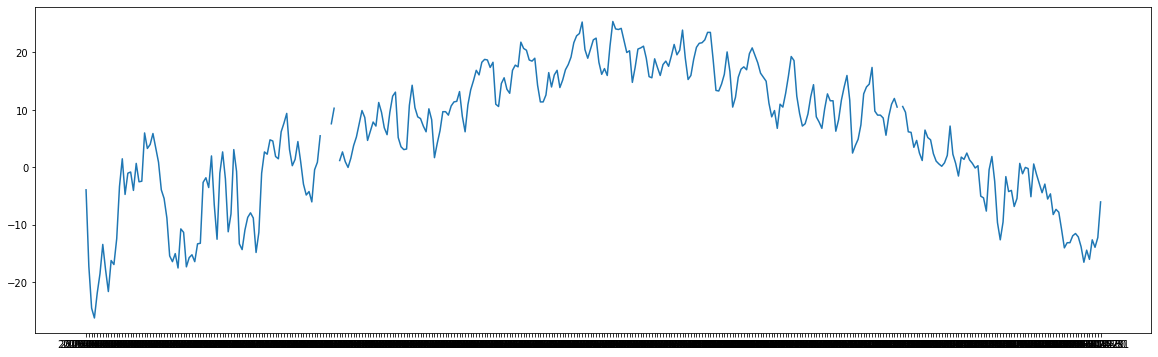

In [285]:
# this dataset Weather_data_2016 to 2018 provides the monitoring stations Longitude and Latitude, alone with different temperatures recordings.
df_weather_2015['datetime'] = pd.to_datetime(df_weather_2015['Date/Time'])
df_weather_2015 = df_weather_2015.drop(['Longitude (x)', 'Latitude (y)', 'Data Quality','Climate ID', 'Max Temp Flag',
                                        'Year', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag',
                                        'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 
                                        'Spd of Max Gust Flag', 'Total Snow (cm)', 'Total Rain (mm)'], axis=1)


# to better understand the data, we were plotting the data.
plt.figure(figsize=(20, 6))
plt.plot(df_weather_2015['Date/Time'], df_weather_2015['Mean Temp (°C)'])

grouped = df_weather_2015.groupby('Month')
mean_temp = grouped['Mean Temp (°C)'].mean()

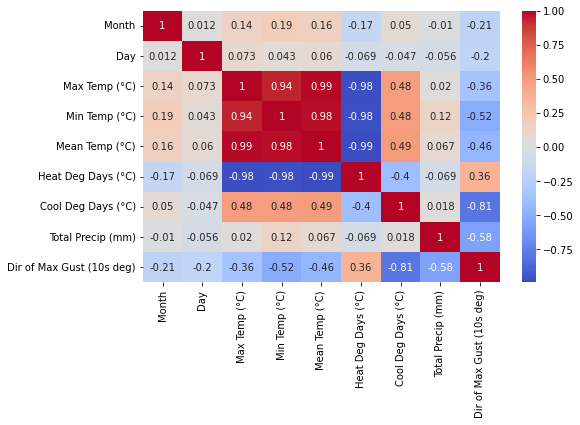

In [286]:
corr_matrix = df_weather_2015.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

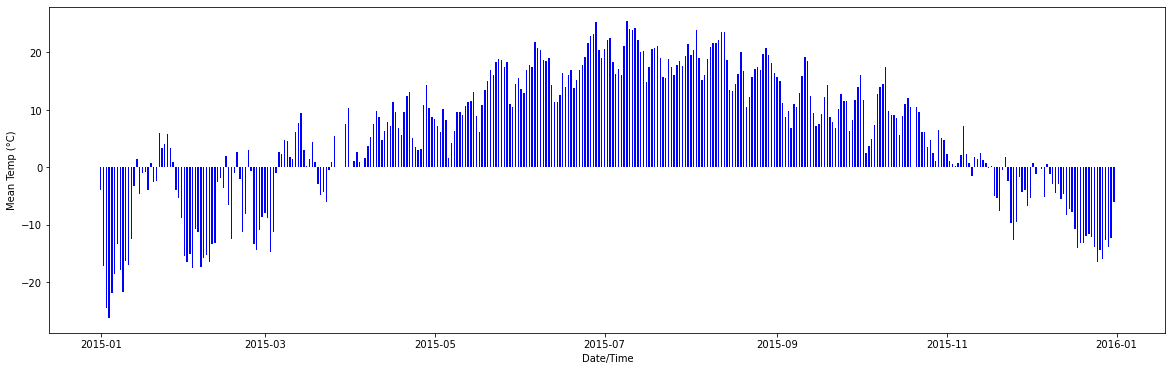

In [287]:
# tried to combine the weather_2017 dataset with the Edmonton_Area_Air_Quality_Readings__2017.csv
df_weather_2015['Date/Time'] = df_weather_2015['Date/Time'].astype('datetime64[ns]')
df_2015_cb = df_2015[df_2015['Parameter Measured'] == 'Carbon Monoxide']
df_combine = pd.merge(df_weather_2015, df_2015_cb, on = 'Date/Time', how = 'inner')

# Create a bar chart using Matplotlib
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.bar(df_combine['Date/Time'], df_combine['Mean Temp (°C)'], color='b', width=0.5)
ax.set_xlabel('Date/Time')
ax.set_ylabel('Mean Temp (°C)')

plt.show()

Wildfire_2015to2018 file:
- This dataset was recorded to be at the individual fire level.
- It contains fire name, fire year, assessment datetime, assessment hectares, current size, size class, fire location latitude and longitude, fire origin, and other related fields.

In [288]:
# another dataset Wildfire_2015to2018.csv. We tried to explore if the wildfire can be predicted and the relationship with Edmonton Air Quality.
fire = pd.read_csv('Wildfire_2015to2018.csv')
fire["assessment_datetime"] = pd.to_datetime(fire["assessment_datetime"]).dt.date
fire['count']=fire.groupby('assessment_datetime')['fire_number'].transform('count')
fire.sample(3)

,fire_number,fire_name,fire_year,assessment_datetime,assessment_hectares,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,...,fuel_type,other_fuel_type,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares,count
193,HWF249,Birch Complex,2015,2015-06-27,0.20,4964.2,E,58.049183,-115.845550,Provincial Land,...,M2,NaN,4964.2,2015/7/22 17:30,4964.2,NaN,NaN,2015/11/24 14:05,4964.2,20
95,HWF131,Buffalo Complex,2015,2015-05-25,0.01,25.1,C,57.528300,-116.988300,Provincial Land,...,NaN,"Pure deciduous, aspen",23.7,2015/5/30 21:00,25.1,NaN,NaN,2015/6/12 08:15,25.1,53
2194,SWF153,NaN,2018,2018-08-18,0.50,0.5,B,56.724250,-114.681617,Provincial Land,...,M2,NaN,0.5,2018/8/18 20:45,0.5,NaN,NaN,2018/8/19 11:58,0.5,4


Traffic_data file ('Average_Annual_Weekday_Traffic_Volumes__2011-2019_.csv'):

- This dataset' attributes such as site number, site name, year, average daily volume, latitude, longitude, location, and geometry point.
- It is focusing on each specific traffic monitoring site and its associated traffic volume for a particular year.

In [289]:
traffic_data = pd.read_csv('Average_Annual_Weekday_Traffic_Volumes__2011-2019_.csv')
traffic_data_2015 = traffic_data[traffic_data['Year'] == 2015]
traffic_data_2015.sample(2)

,Site Number,Site Name,Year,Average Daily Volume,Latitude,Longitude,Location,Geometry Point
20164,315060,118 Avenue West of 178 Street,2015,7100,53.570466,-113.628494,"(53.5704656, -113.6284935)",POINT (-113.6284935 53.5704656)
24643,537991,75 Street North of Roper Road,2015,38800,53.493962,-113.442669,"(53.493962, -113.442669)",POINT (-113.442669 53.493962)


We made a list containing tuples of latitude and longitude values, and we tried to make a traffic map.

In [290]:
locations = traffic_data_2015[['Location']].values.tolist()
traffic_volumes = traffic_data_2015['Average Daily Volume'].tolist()

# Create a list of latitudes and longitudes from the traffic data
locations = []
for location in traffic_data_2015['Location']:
    lat, lon = location.strip('()').split(', ')
    locations.append((float(lat), float(lon)))

Edmonton Hourly Reading file ('Central_Hourly_Readings_from2019.csv'):

- This dataset has the air quality measurements are recorded and reported for every hour.
- Various air quality measurements: Carbon Monoxide (ppm), Methane (ppm), Nitric Oxide (ppm), Nitrogen Dioxide (ppm), Non-methane Hydrocarbons (ppm), Outdoor Air Temperature (deg C), Ozone (ppm) etc.
- IntervalStart: The starting timestamp of the one-hour interval.
- IntervalEnd: The ending timestamp of the one-hour interval.

In [291]:
# the Edmonton Hourly readings.
# Central_Hourly_Readings_2015-2018, Central_Hourly_Readings_from2019, East_Hourly_Readings_2015-2018, East_Hourly_Readings_from2019
df_AQ2 = pd.read_csv('Central_Hourly_Readings_2015-2018.csv')
df_AQ2.sample(3)

,IntervalStart,IntervalEnd,Carbon Monoxide(ppm),Methane(ppm),Nitric Oxide(ppm),Nitrogen Dioxide(ppm),Non-methane Hydrocarbons(ppm),Outdoor Air Temperature(deg C),Ozone(ppm),PM2.5 Mass(ug/m3),Total Hydrocarbons(ppm),Total Oxides Of Nitrogen(ppm)
11885,05/10/2016 05:00:00,05/10/2016 05:59:00,0.2,2.2,0.0098,0.0234,0.0,5.3,0.005,NaN,2.2,0.0332
6034,09/09/2015 10:00:00,09/09/2015 10:59:00,0.4,2.1,0.0294,0.0166,0.0,18.7,0.006,13.0,2.1,0.0460
3023,05/06/2015 23:00:00,05/06/2015 23:59:00,0.2,1.8,0.0012,0.0134,0.0,2.7,0.023,3.0,1.8,0.0146


In [292]:
# iterate through the column names and check for extra spaces
for col in df_AQ2.columns:
    if len(col) != len(col.strip()):
        print(f"Column name '{col}' contains extra spaces.")

In [293]:
df_AQ2 = df_AQ2[['IntervalStart', 'Carbon Monoxide(ppm)']]
df_AQ2 = df_AQ2.dropna()
df_AQ2['ds'] = pd.to_datetime(df_AQ2['IntervalStart'])
df_AQ2.set_index('ds', inplace=True)

# Eliminating all duplicated rows with drop_duplicates
df_AQ2.drop_duplicates(inplace= True)

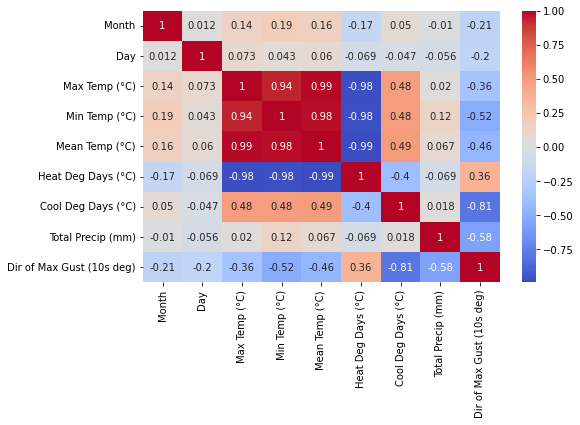

In [294]:
# Creating correlatin Matrix
corr = df_AQ2.corr()

# create a heatmap using Seaborn
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### <li>3- EXPLORATORY DATA ANALYSIS(EDA):

In [295]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date/Time                    1461 non-null   object 
 1   Air Quality Index            1461 non-null   float64
 2   Carbon Monoxide              1461 non-null   float64
 3   Hydrogen Sulphide            1448 non-null   float64
 4   Methane                      1459 non-null   float64
 5   Nitric Oxide                 1461 non-null   float64
 6   Nitrogen Dioxide             1461 non-null   float64
 7   Non-methane Hydrocarbons     1455 non-null   float64
 8   Outdoor Air Temperature      1461 non-null   float64
 9   Ozone                        1461 non-null   float64
 10  PM10 Mass                    412 non-null    float64
 11  PM2.5 Mass                   1461 non-null   float64
 12  Relative Humidity            1452 non-null   float64
 13  Std. Dev. of Wind 

In [296]:
df4['Date/Time']=df4['Date/Time'].astype('datetime64[ns]')

In [297]:
df4.describe()

,Air Quality Index,Carbon Monoxide,Hydrogen Sulphide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Sulphur Dioxide,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
count,1461.000000,1461.000000,1448.000000,1459.000000,1461.000000,1461.000000,1455.000000,1461.000000,1461.000000,412.000000,1461.000000,1452.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2.480162,0.240321,0.000430,2.033454,0.006867,0.012859,0.101951,6.093405,0.022418,13.661300,8.719096,61.827887,22.258482,0.000737,2.158484,0.019724,204.686205,8.557672
std,0.511731,0.088793,0.000394,0.151148,0.007501,0.007358,0.116663,11.601815,0.009545,11.247316,8.977521,14.997294,6.583775,0.000757,0.193157,0.013949,58.015487,2.970631
min,1.477333,0.063900,0.000000,1.022200,0.000333,0.001467,0.000000,-27.983350,0.001333,1.000000,0.472200,19.083300,9.020850,0.000000,1.870800,0.002000,35.291650,3.208350
25%,2.176700,0.191300,0.000100,1.953250,0.002633,0.007267,0.033350,-1.702050,0.015600,6.708300,4.680533,51.072900,17.437500,0.000200,2.041667,0.010100,165.750000,6.493750
50%,2.405767,0.222233,0.000300,2.017400,0.004433,0.010867,0.068750,6.484733,0.021767,10.895850,6.867067,62.541700,21.014250,0.000550,2.115933,0.015533,204.979200,8.081250
75%,2.671533,0.272233,0.000700,2.092633,0.008100,0.016750,0.125150,16.204150,0.028733,16.968725,9.833350,73.218725,25.958300,0.001000,2.223300,0.025033,247.520850,10.004150
max,7.415000,1.104133,0.002200,3.020800,0.095500,0.041800,1.927100,28.481933,0.051967,125.208300,119.152800,95.083300,48.583300,0.007000,4.850000,0.133267,340.666700,26.933350


In [298]:
df4.isnull().sum()

Date/Time                         0
Air Quality Index                 0
Carbon Monoxide                   0
Hydrogen Sulphide                13
Methane                           2
Nitric Oxide                      0
Nitrogen Dioxide                  0
Non-methane Hydrocarbons          6
Outdoor Air Temperature           0
Ozone                             0
PM10 Mass                      1049
PM2.5 Mass                        0
Relative Humidity                 9
Std. Dev. of Wind Direction       0
Sulphur Dioxide                   0
Total Hydrocarbons                0
Total Oxides Of Nitrogen          0
Wind Direction                    0
Wind Speed                        0
dtype: int64

In [299]:
sns.pairplot(df4, diag_kind="kde")

The heatmap below highlights the correlation between AQI and PM2.5


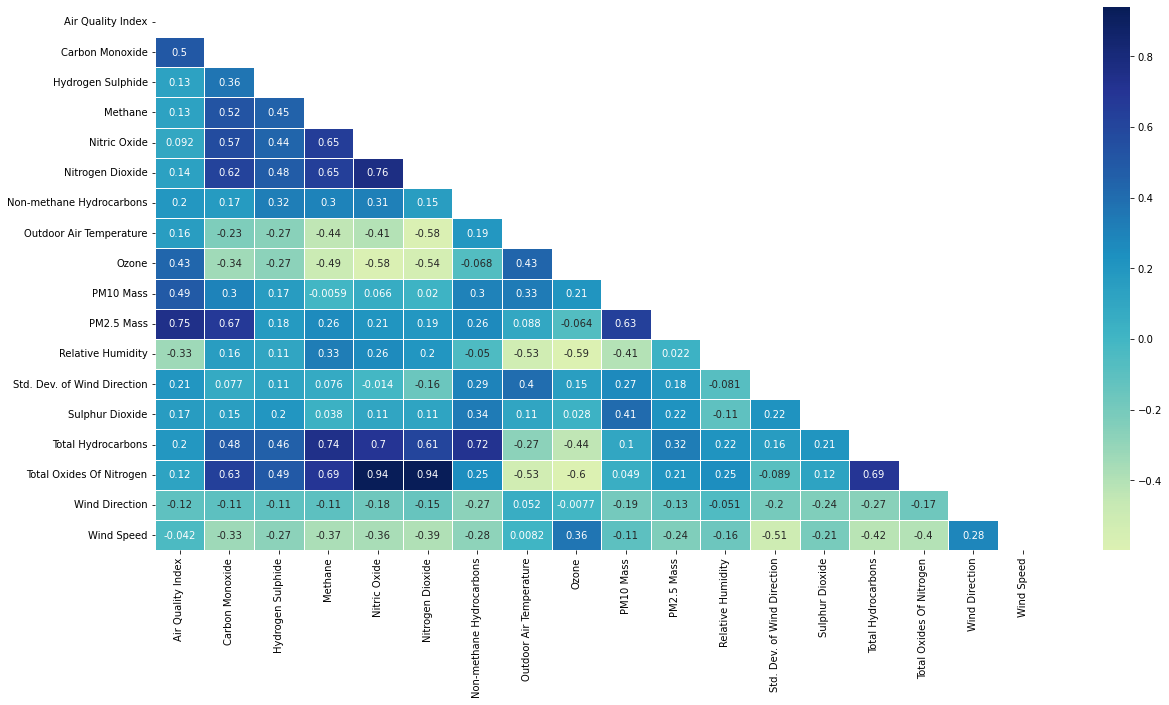

In [ ]:
corr_matrix = df4.corr()
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()



To examine the spikes in various parameters such as CO, NO, NO2, PM2.5, sulfur dioxide, total oxides of nitrogen, and ozone, their values were plotted using the Plotly Express library. Specifically, a line plot was created to visualize the trends of these parameters within different AQI ranges. However, after examining the resulting graphs, it was found that the spike patterns of these parameters did not align with the expected AQI patterns.

In [ ]:
df4.head()

,Date/Time,Air Quality Index,Carbon Monoxide,Hydrogen Sulphide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Sulphur Dioxide,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
0,2015-01-01,2.405967,0.197200,0.0001,1.94790,0.002200,0.007067,0.06665,2.8167,0.027900,1.0000,2.277767,75.8750,13.79165,0.00120,2.052767,0.009267,220.33335,11.92500
1,2015-01-02,2.308133,0.205567,0.0005,2.01040,0.011400,0.017633,0.09585,-16.1375,0.018600,3.0435,6.213633,80.7083,16.14585,0.00185,2.176400,0.029033,131.31250,10.11460
2,2015-01-03,2.387533,0.172233,0.0003,2.03125,0.005867,0.017600,0.00420,-21.7134,0.018467,4.0417,6.731467,70.7500,14.50000,0.00070,2.130567,0.023433,301.35415,8.05420
3,2015-01-04,2.419300,0.250033,0.0009,2.22500,0.012100,0.025067,0.06670,-24.9458,0.011300,6.8750,8.442467,69.9583,12.77085,0.00100,2.355567,0.037167,198.10415,7.36875
4,2015-01-05,2.965700,0.345833,0.0011,2.26250,0.027367,0.032533,0.17710,-20.1458,0.006267,9.2500,17.488900,67.3750,17.93750,0.00125,2.475000,0.059833,227.60415,5.97290


In [ ]:
import plotly.express as px
fig_CO = px.line(df4, x='Date/Time', y= 'Carbon Monoxide')
fig_CO.show()

In [ ]:
fig_AQI = px.line(df4, x='Date/Time', y= 'Air Quality Index')
fig_AQI.show()

In [ ]:
fig_PM = px.line(df4, x='Date/Time', y= 'PM2.5 Mass')
fig_PM.show()

In [ ]:
fig_NO2 = px.line(df4, x='Date/Time', y= 'Nitrogen Dioxide')
fig_NO2.show()

In [ ]:
fig_NO = px.line(df4, x='Date/Time', y= 'Nitric Oxide')
fig_NO.show()

In [ ]:
fig_SO = px.line(df4, x='Date/Time', y= 'Sulphur Dioxide')
fig_SO.show()

In [ ]:
fig_Ozone = px.line(df4, x='Date/Time', y= 'Ozone')
fig_Ozone.show()

In [ ]:
fig_TON = px.line(df4, x='Date/Time', y= 'Total Oxides Of Nitrogen')
fig_TON.show()

To explore the relationship between the occurrence of wildfires and spikes in AQI, we created a graph depicting the frequency of wildfires and examined whether it corresponded with any spikes in AQI. However, upon analyzing the resulting graphs, we found that the patterns of wildfires did not align with the observed spikes in AQI.

In [ ]:
fire=pd.read_csv('Wildfire_2015to2018.csv')

In [ ]:
fire.head()

,fire_number,fire_name,fire_year,assessment_datetime,assessment_hectares,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,...,weather_conditions_over_fire,fuel_type,other_fuel_type,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,CWF010,NaN,2015,2015/5/3 15:00,0.01,0.01,A,51.044850,-115.179167,Provincial Land,...,Clear,C3,NaN,0.01,2015/5/3 17:10,0.01,NaN,NaN,2015/5/3 17:45,0.01
1,CWF102,NaN,2015,2015/5/27 16:28,0.01,0.02,A,51.044950,-115.432667,Provincial Land,...,CB Wet,C3,NaN,0.02,2015/5/27 18:45,0.02,NaN,NaN,2015/5/27 19:44,0.02
2,CWF110,NaN,2015,2015/6/20 11:58,0.02,0.02,A,51.145800,-114.927567,Provincial Land,...,CB Dry,M2,NaN,0.02,2015/6/20 12:18,0.02,NaN,NaN,2015/6/20 13:55,0.02
3,CWF134,NaN,2015,2015/7/29 16:00,0.01,0.01,A,51.117133,-114.846750,Indian Reservation,...,Clear,C2,NaN,0.01,2015/7/29 17:45,0.01,NaN,NaN,2015/7/30 19:16,0.01
4,CWF176,NaN,2015,2015/8/11 13:10,0.03,0.01,A,49.496833,-114.501667,Provincial Land,...,Clear,S1,NaN,0.03,2015/8/11 15:30,0.03,NaN,NaN,2015/8/12 11:25,0.01


In [ ]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_number                   2214 non-null   object 
 1   fire_name                     135 non-null    object 
 2   fire_year                     2214 non-null   int64  
 3   assessment_datetime           2214 non-null   object 
 4   assessment_hectares           2214 non-null   float64
 5   current_size                  2214 non-null   float64
 6   size_class                    2214 non-null   object 
 7   fire_location_latitude        2214 non-null   float64
 8   fire_location_longitude       2214 non-null   float64
 9   fire_origin                   2214 non-null   object 
 10  general_cause_desc            2214 non-null   object 
 11  fire_start_date               2214 non-null   object 
 12  det_agent_type                2214 non-null   object 
 13  dis

In [ ]:

fire["assessment_datetime"] = pd.to_datetime(fire["assessment_datetime"]).dt.date
fire.head()

,fire_number,fire_name,fire_year,assessment_datetime,assessment_hectares,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,...,weather_conditions_over_fire,fuel_type,other_fuel_type,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,CWF010,NaN,2015,2015-05-03,0.01,0.01,A,51.044850,-115.179167,Provincial Land,...,Clear,C3,NaN,0.01,2015/5/3 17:10,0.01,NaN,NaN,2015/5/3 17:45,0.01
1,CWF102,NaN,2015,2015-05-27,0.01,0.02,A,51.044950,-115.432667,Provincial Land,...,CB Wet,C3,NaN,0.02,2015/5/27 18:45,0.02,NaN,NaN,2015/5/27 19:44,0.02
2,CWF110,NaN,2015,2015-06-20,0.02,0.02,A,51.145800,-114.927567,Provincial Land,...,CB Dry,M2,NaN,0.02,2015/6/20 12:18,0.02,NaN,NaN,2015/6/20 13:55,0.02
3,CWF134,NaN,2015,2015-07-29,0.01,0.01,A,51.117133,-114.846750,Indian Reservation,...,Clear,C2,NaN,0.01,2015/7/29 17:45,0.01,NaN,NaN,2015/7/30 19:16,0.01
4,CWF176,NaN,2015,2015-08-11,0.03,0.01,A,49.496833,-114.501667,Provincial Land,...,Clear,S1,NaN,0.03,2015/8/11 15:30,0.03,NaN,NaN,2015/8/12 11:25,0.01


In [ ]:
fire['count']=fire.groupby('assessment_datetime')['fire_number'].transform('count')
fire

,fire_number,fire_name,fire_year,assessment_datetime,assessment_hectares,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,...,fuel_type,other_fuel_type,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares,count
0,CWF010,NaN,2015,2015-05-03,0.01,0.01,A,51.044850,-115.179167,Provincial Land,...,C3,NaN,0.01,2015/5/3 17:10,0.01,NaN,NaN,2015/5/3 17:45,0.01,2
1,CWF102,NaN,2015,2015-05-27,0.01,0.02,A,51.044950,-115.432667,Provincial Land,...,C3,NaN,0.02,2015/5/27 18:45,0.02,NaN,NaN,2015/5/27 19:44,0.02,14
2,CWF110,NaN,2015,2015-06-20,0.02,0.02,A,51.145800,-114.927567,Provincial Land,...,M2,NaN,0.02,2015/6/20 12:18,0.02,NaN,NaN,2015/6/20 13:55,0.02,1
3,CWF134,NaN,2015,2015-07-29,0.01,0.01,A,51.117133,-114.846750,Indian Reservation,...,C2,NaN,0.01,2015/7/29 17:45,0.01,NaN,NaN,2015/7/30 19:16,0.01,5
4,CWF176,NaN,2015,2015-08-11,0.03,0.01,A,49.496833,-114.501667,Provincial Land,...,S1,NaN,0.03,2015/8/11 15:30,0.03,NaN,NaN,2015/8/12 11:25,0.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,WWF044,NaN,2018,2018-06-25,0.01,0.01,A,54.565000,-115.390050,Provincial Land,...,C2,NaN,0.01,2018/6/25 18:20,0.01,NaN,NaN,2018/6/25 21:30,0.01,7
2210,WWF046,NaN,2018,2018-07-11,0.01,0.01,A,54.182800,-115.826500,Provincial Land,...,M2,NaN,0.01,2018/7/11 20:45,0.01,NaN,NaN,2018/7/12 13:45,0.01,1
2211,WWF048,NaN,2018,2018-07-18,0.05,0.55,B,54.016900,-117.071550,Provincial Land,...,S1,NaN,0.55,2018/7/18 21:02,0.55,NaN,NaN,2018/7/22 15:30,0.55,14
2212,WWF050,NaN,2018,2018-07-29,0.10,0.01,A,54.649083,-115.556383,Provincial Land,...,C2,NaN,0.01,2018/7/29 17:52,0.01,NaN,NaN,2018/7/29 20:17,0.01,13


In [ ]:
fig4 = px.scatter(fire, x='assessment_datetime',y='count')
fig4.show()


## <li>4- DATA MODELLING AND INFERENCES:

 ### 1- Decision Tree Regressor model by TARA
 > https://github.com/DATA3960/1222_Group3/blob/main/2018_AQ.ipynb
 
Following defines a scikit-learn pipeline that includes a Decision Tree Regressor model to predict the Air Quality Index based on various input features. The pipeline includes data preprocessing steps such as imputing missing values and scaling the numeric features.


### 2-  Random Forest model  by TARA
> https://github.com/DATA3960/1222_Group3/blob/main/Central_Data.ipynb

<br>Follwoing code builds a scikit-learn pipeline that includes a Random Forest Regressor model to predict the Air Quality Index. The pipeline also includes a feature selection step using Recursive Feature Elimination with Cross-Validation (RFECV) to select the most important features for the model. The GridSearchCV function is used to perform a grid search over a range of hyperparameters for both the Random Forest Regressor and the Decision Tree Regressor (used in the feature selection step).

The clf3 object returned by GridSearchCV is then used to fit the best model on the training data (x_train and y_train) and evaluate it on the test data (x_test and y_test).

The best model obtained from the grid search is stored in the best3 variable. The R-squared score and the root mean squared error (RMSE) of the best model are printed to evaluate the performance of the model on the test data.

Overall, this code performs hyperparameter tuning to optimize the performance of a Random Forest Regressor model for predicting Air Quality Index based on the input features.

### 3 - Stochastic Gradient Descent (SGD) Regressor model BY TARA
>https://github.com/DATA3960/1222_Group3/blob/main/2018_AQ.ipynb

The above code defines a scikit-learn pipeline that includes a Stochastic Gradient Descent (SGD) Regressor model to predict the Air Quality Index based on various input features. The pipeline includes data preprocessing steps such as imputing missing values and scaling the numeric features.

The pipeline object is then fitted on the training data (x_train and y_train) and evaluated on the test data (x_test and y_test). The score method of the pipeline object is used to compute the R-squared score of the model on the test data.

The R-squared score indicates the proportion of the variance in the target variable (Air Quality Index) that is predictable from the input features. The higher the R-squared score, the better the model fits the data. The root mean squared error (RMSE) is also computed and printed as an additional evaluation metric. The RMSE indicates the average distance between the predicted and actual values of the target variable.

Overall, this code builds and evaluates a pipeline that includes an SGD Regressor model for predicting Air Quality Index based on the input features

In [ ]:
# Define the problem
pm25_mean = df4['PM2.5 Mass'].mean()
pm25_std = df4['PM2.5 Mass'].std()
temperature_mean = df4['Outdoor Air Temperature'].mean()
temperature_std = df4['Outdoor Air Temperature'].std()
humidity_mean = df4['Relative Humidity'].mean()
humidity_std = df4['Relative Humidity'].std()
wind_speed_mean = df4['Wind Speed'].mean()
wind_speed_std = df4['Wind Speed'].std()
CO_mean=df4['Carbon Monoxide'].mean()
CO_std=df4['Carbon Monoxide'].std()
num_simulations = 1000
sim_period = 365


# Define the probability distribution
pm25_distribution = np.random.lognormal(mean=np.log(pm25_mean), sigma=np.log(pm25_std/pm25_mean), size=num_simulations)
temperature_distribution = np.random.normal(loc=temperature_mean, scale=temperature_std, size=num_simulations)
humidity_distribution = np.random.normal(loc=humidity_mean, scale=humidity_std, size=num_simulations)
wind_speed_distribution = np.random.normal(loc=wind_speed_mean, scale=wind_speed_std, size=num_simulations)
co_distribution=np.random.normal(loc=CO_mean, scale=CO_std, size=num_simulations)

# Run the model
aqi_values = []
for i in range(num_simulations):

    # Calculate AQI using the EPA formula
    c_pm25 = pm25_distribution[i]
    c_co = co_distribution[i]
    c = max(c_pm25, c_co)
    ihi = int(round(10 * (0.5 + 0.5 * (c/ 150) ** 3)))
    aqi_values.append(ihi)

# Analyze the results
mean = sum(aqi_values) / num_simulations
std_dev = ((sum((r - mean)**2 for r in aqi_values)) / num_simulations)**0.5
min_val = min(aqi_values)
max_val = max(aqi_values)

print("Mean: {:.2f}".format(mean))
print("Standard deviation: {:.2f}".format(std_dev))
print("Minimum value: {:.2f}".format(min_val))
print("Maximum value: {:.2f}".format(max_val))

Mean: 5.00
Standard deviation: 0.00
Minimum value: 5.00
Maximum value: 5.00


### 4- ARIMA (AutoRegressive Integrated Moving Average) model BY TARA
>https://github.com/DATA3960/1222_Group3/blob/main/2018_AQ.ipynb

Follwoing code uses the statsmodels library to fit an ARIMA (AutoRegressive Integrated Moving Average) model to a time series of Air Quality Index data. ARIMA is a popular model for time series forecasting that can be used to model both trends and seasonal patterns in data.

The code first loads the data from an Excel file using Pandas and sets the Date/Time column as the index of the DataFrame. Then, it defines an ARIMA model with an order of (1,1,1), indicating that the model should include one autoregressive term, one differencing term, and one moving average term. The model is then fitted to the Air Quality Index data using the fit method of the ARIMA class.

After the model is fitted, the code uses the predict method to generate predictions for the Air Quality Index values for a future time period, from December 6 to December 12, 2023. The dynamic parameter is set to True, which means that the model will use the predicted values as inputs for subsequent predictions.

Finally, the predictions are printed to the console using the print function.

In [ ]:
data=pd.read_csv('Communities AQHI.csv')
data.tail()

,Date,Edmonton
8733,Apr 2 2023 06:00 MDT,4.0
8734,Apr 2 2023 07:00 MDT,4.0
8735,Apr 2 2023 08:00 MDT,4.0
8736,Apr 2 2023 09:00 MDT,4.0
8737,Apr 2 2023 10:00 MDT,4.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# Load the data
data = pd.read_csv('Communities AQHI.csv', index_col='Date', parse_dates=True)

# Fit the ARIMA model
model = sm.tsa.ARIMA(data, order=(1,1,1))
results = model.fit()

# Make predictions
predictions = results.predict(start='2023-04-15', end='2023-04-30', dynamic=False)

# Print predictions
print(predictions)

2023-04-15 00:00:00    3.875114
2023-04-15 01:00:00    3.875114
2023-04-15 02:00:00    3.875114
2023-04-15 03:00:00    3.875114
2023-04-15 04:00:00    3.875114
                         ...   
2023-04-29 20:00:00    3.875114
2023-04-29 21:00:00    3.875114
2023-04-29 22:00:00    3.875114
2023-04-29 23:00:00    3.875114
2023-04-30 00:00:00    3.875114
Freq: H, Name: predicted_mean, Length: 361, dtype: float64


### 5- SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model BY TARA
> https://github.com/DATA3960/1222_Group3/blob/main/2018_AQ.ipynb

This code uses the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model from the statsmodels library to forecast future values of the "Air Quality Index" variable in the "Final_data.xlsx" dataset.

The SARIMAX model is a time series forecasting model that is an extension of the ARIMA model. It allows for the inclusion of seasonal components in the model and is useful for datasets with seasonal patterns.

In this code, the SARIMAX model is fitted to the "Air Quality Index" variable in the data DataFrame with an order of (1,1,1) for the non-seasonal component and a seasonal order of (1,1,1,7) with a period of 7 days. The results.predict() method is used to generate predictions for future dates between 2023-04-09 and 2023-04-15, inclusive.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd


# Fit SARIMA model
model = SARIMAX(data['Edmonton'], order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit()

# Make predictions
predictions = results.predict(start='2023-04-16', end='2023-04-30', dynamic=True)

# Print predictions
print(predictions)

2023-04-16 00:00:00    3.965599
2023-04-16 01:00:00    3.962309
2023-04-16 02:00:00    3.955009
2023-04-16 03:00:00    3.930891
2023-04-16 04:00:00    3.933219
                         ...   
2023-04-29 20:00:00    3.980121
2023-04-29 21:00:00    3.982449
2023-04-29 22:00:00    4.005623
2023-04-29 23:00:00    4.019141
2023-04-30 00:00:00    4.015876
Freq: H, Name: predicted_mean, Length: 337, dtype: float64


### 6- Vector Autoregressive (VAR) BY ELSA
>https://github.com/DATA3960/1222_Group3/blob/main/Model_VAR.ipynb

Vector Autoregressive (VAR) is a statistical model used to capture the linear interdependencies among multiple time series variables. It is an extension of the univariate autoregressive (AR) model to multivariate time series data. In a VAR model, each variable is modeled as a linear combination of its own lagged values and the lagged values of other variables in the system.

### INFERENCE: 
The main idea behind VAR models is to capture the dynamic relationships among multiple variables over time. They are commonly used in econometrics, finance, and other fields where multiple time series variables influence each other.
we might not choose to use a VAR model for certain time series forecasting tasks. The model can become complex as the number of time series variables and lags increase, potentially leading to overfitting and difficulties in interpretation. Additionally, while VAR models can capture seasonality by including seasonal lags, this approach is indirect and may not be as effective as other techniques. Moreover, VAR models require stationary time series data, necessitating additional preprocessing steps if the data is non-stationary. Finally, they work best with large sample sizes and do not explicitly capture causality between variables, relying instead on correlations that may not imply causality.

### 7- SARIMA (Seasonal Autoregressive Integrated Moving Average) model BY SHIKHA
>https://github.com/DATA3960/1222_Group3/blob/main/2015_weather.ipynb

This code performs time series analysis using SARIMA (Seasonal Autoregressive Integrated Moving Average) model to predict the Air Quality Index for a specified date range.

The data is loaded and resampled to daily frequency, and missing values are filled using the 'pad' method. The columns of interest are selected and split into training and testing sets.

Then, the order of the SARIMA model is defined, and exogenous data is obtained for the specified date range. If there is any row in the exogenous data, the SARIMA model is fit to the training data with the exogenous data, and the predictions for the specified period are generated using the fitted model. Finally, the predicted AQI values are printed.

### INFERENCE: 
It appears that the model is predicting the daily Air Quality Index (AQI) values for the year 2018, and the predictions range from approximately 1.9 to 2.9. The fact that there is little variation in the predicted values could suggest that the model is not effectively capturing any underlying patterns or trends in the data. It's possible that additional variables or more complex modeling techniques could lead to more accurate and varied predictions.

### 8- SARIMAX model BY SHIKHA
>https://github.com/DATA3960/1222_Group3/blob/main/2015_weather.ipynb

This is a SARIMAX model from the statsmodels package in Python. SARIMAX stands for Seasonal Autoregressive Integrated Moving Average with Exogenous Variables. This model is a time series forecasting model that includes the effects of external or exogenous variables that may have an impact on the variable being forecasted, in this case, the air quality index (AQI).

The model is fitted to the historical data of AQI values and exogenous variables. Once the model is fitted, it is used to generate a forecast for the next 12 months or steps. The forecast method of the results object is used to generate the forecasted AQI values for the next year based on the fitted SARIMAX model.

### INFERENCE: 
Based on the results obtained, it seems that the SARIMAX model with exogenous variables is performing better than the SARIMAX model without exogenous variables. The SARIMAX model with exogenous variables was able to capture more variations in the data, as seen from the smaller errors in the predictions. Therefore, it can be inferred that the inclusion of exogenous variables in the model has improved its performance. but the values have almost the same which is not true in general therefore not using this model for final prediction.

### 9 - Facebook Prophet BY SHIKHA
>https://github.com/DATA3960/1222_Group3/blob/main/Model_Prophet_shikha.ipynb

This is a time series forecasting model using Facebook Prophet, which is a popular open-source library for time series forecasting. The model is trained on a historical dataset with various exogenous variables or regressors, such as Carbon Monoxide, Methane, Nitric Oxide, etc., and it is used to predict the Air Quality Index for the test period. The model also adds daily seasonality to the forecast using the daily_seasonality=True parameter. The add_regressor() function is used to add each of the exogenous variables to the model. The model is fitted to the training data using the fit() function, and predictions are made for the test data using the predict() function. The predicted AQI values, along with their lower and upper bounds, are printed using the forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] command.

### INFERENCE: 
<br>MSE: 0.02681647560396771
<br>The Prophet model is a powerful time series forecasting model that can capture complex seasonal patterns and trends, as well as incorporate additional regressors to improve forecast accuracy. By adding multiple regressors like Carbon Monoxide, Methane, Nitric Oxide, Nitrogen Dioxide, Outdoor Air Temperature, Ozone, PM2.5 Mass, Sulphur Dioxide, and Std. Dev. of Wind Direction to the model, it can better capture the impact of these variables on the target variable, Air Quality Index (AQI).

The above implementation fits the Prophet model to the training data up to the end of 2018 and then makes predictions for the test data for the year 2019. The resulting forecast contains the predicted AQI values along with the upper and lower bounds of the confidence interval.

Therefore, we can infer that the Prophet model with additional regressors has the potential to improve the accuracy of AQI forecasting compared to simpler models like SARIMA, especially when the underlying data is complex and affected by multiple factors.

### 10 - Seasonal exponential smoothing model BY SHIKHA
>https://github.com/DATA3960/1222_Group3/blob/main/Model_SES.ipynb

This is a seasonal exponential smoothing model implemented using the Holt-Winters method. The model is trained on the historical air quality index data for the years 2012-2017 and used to predict the air quality index values for the year 2018. The model uses the seasonal='add' option to capture the additive seasonal effect of air pollution on a daily basis. The seasonal period is set to 365 days, indicating that the model is taking into account the annual seasonality in air pollution. The model is evaluated using the root mean squared error (RMSE) and mean absolute percentage error (MAPE) metrics. Finally, the model is used to make future predictions for air pollution levels.



### INFERENCE: 
RMSE: 0.8861397461695634
<br>MAPE: 18.721648778492536
<br>The forcasting values that are almost similar with little variance therefore it cannot be trusted for final prediction.

###  11- Long Short-Term Memory (LSTM) neural network model BY SHIKHA
>https://github.com/DATA3960/1222_Group3/blob/main/Model_LSTM.ipynb

LSTMs are a type of recurrent neural network (RNN) that can remember past information and use it to make predictions. They are particularly useful for time series data like the pollution data in this example, where past observations can be used to predict future values.

LSTM models can capture both short-term and long-term dependencies in the data, making them well-suited for time series prediction tasks. They are also capable of handling non-linear relationships between inputs and outputs, which can be useful when dealing with complex, real-world data.

One potential downside of LSTM models is that they can be computationally expensive to train, particularly when working with large datasets. Additionally, they can be difficult to interpret, which may make it challenging to understand how the model is making its predictions.
### INFERENCE: 
This model was was showing 'ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,17)' on our data

###  12- Naive Forecaster model by ELSA
>https://github.com/DATA3960/1222_Group3/blob/main/Model_NaiveForecaster.ipynb

The NaiveForecaster is a simple yet effective time series forecasting model that serves as a baseline for more complex forecasting models. This model does not consider any patterns, trends, or seasonality in the data. 

### INFERENCE: 
NaiveForecaster does not provide uncertainty estimates, such as prediction intervals, whereas FB Prophet can generate uncertainty intervals for its forecasts. Uncertainty estimates are essential in assessing the reliability of forecasts and supporting decision-making in real-world applications. It may struggle to forecast more distant time points accurately. It may not be suitable for datasets with complex patterns, trends, or seasonality. 

## <li> FINAL MODEL: PROPHET 

For this project, we explored FBProphet model in forecasting AQI in Edmonton.

Facebook Prophet is a time series forecasting model developed by Facebook's Core Data Science team in 2017. It is designed to be a robust and efficient tool for forecasting time series data with strong seasonal effects, as well as trends that can be modeled using linear or non-linear functions. The model is built on the idea of decomposing time series data into three components: trend, seasonality, and noise, which are then modeled separately and combined to make predictions. Prophet uses Bayesian inference to fit the model and provides various options for customization, including the ability to incorporate holidays and custom seasonalities. It has gained widespread popularity in the business and data science communities due to its ease of use, flexibility, and ability to handle large datasets with missing values and outliers.

In [40]:
# import the FB Prophet Library
from prophet import Prophet as fbProphet
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_squared_percentage_error, mean_squared_error
from sktime.utils.plotting import plot_series

We tested this model on two (2) datasets, updated_dataset_csv and the Communities AQHI csv files.

We tried training FB Prophet model for each parameter. We wanted to try if we can build models that can have accurate predictions on parameters.

In [42]:
pivoted_df3 = pd.read_csv('updated_dataset.csv')
pivoted_df3['Date/Time']=pivoted_df3['Date/Time'].astype('datetime64[ns]')
pivoted_df3.dropna(inplace=True)

<AxesSubplot:xlabel='ds', ylabel='y'>

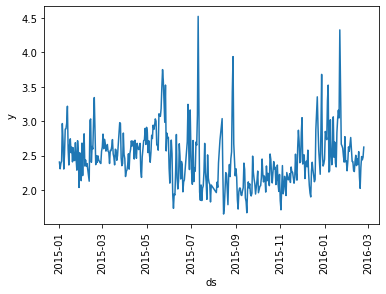

In [43]:
AQI_forecast3 = pivoted_df3[['Date/Time', 'Air Quality Index']]
AQI_forecast3.rename(columns={"Date/Time": "ds", "Air Quality Index": "y"}, inplace=True)
AQI_forecast3['ds'] = AQI_forecast3['ds'].dt.tz_localize(None)
AQI_forecast3.head()
plt.xticks(rotation=90)
sns.lineplot(x=AQI_forecast3.ds, y=AQI_forecast3["y"])

20:40:41 - cmdstanpy - INFO - Chain [1] start processing
20:40:44 - cmdstanpy - INFO - Chain [1] done processing


0.1441797389052092

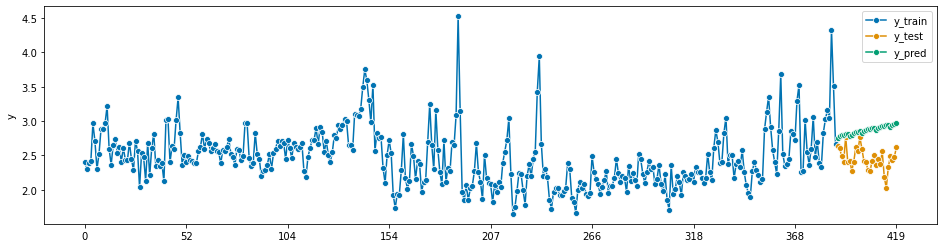

In [44]:
# Convert index to pd.DatetimeIndex
train, test = temporal_train_test_split(AQI_forecast3, test_size=30)

AQIprophet = fbProphet(daily_seasonality=True)

AQIprophet.add_country_holidays(country_name="Canada")
AQIprophet.add_seasonality(name="weekly", fourier_order=15, period=7)

AQIprophet.fit(train)
preds = AQIprophet.predict(test)
preds.index = test.index

plot_series(train["y"], test["y"], preds["yhat"], labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(preds["yhat"], test["y"])

In [45]:
parameter_list = ['Outdoor Air Temperature', 'Nitric Oxide', 'Nitrogen Dioxide', 'Sulphur Dioxide', 'PM2.5 Mass', 'Ozone', 'Carbon Monoxide', 'Air Quality Index']

In [47]:
prophet_models = {}

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = pivoted_df3[['Date/Time', param]]
    param_df.rename(columns={"Date/Time": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Split the data into training and testing sets
    train, test = temporal_train_test_split(param_df, test_size=30)
    
    # Create a new fbProphet model and fit it to the training data
    prophet_model = fbProphet(daily_seasonality=True)
    prophet_model.add_country_holidays(country_name="Canada")
    prophet_model.add_seasonality(name="weekly", fourier_order=15, period=7)
    prophet_model.fit(train)
    
    # Use the fitted model to make predictions on the test data
    preds = prophet_model.predict(test)
    preds.index = test.index
    
    # Store the model in the dictionary with the parameter name as the key
    prophet_models[param] = prophet_model

20:41:49 - cmdstanpy - INFO - Chain [1] start processing
20:41:50 - cmdstanpy - INFO - Chain [1] done processing
20:41:51 - cmdstanpy - INFO - Chain [1] start processing
20:41:51 - cmdstanpy - INFO - Chain [1] done processing
20:41:51 - cmdstanpy - INFO - Chain [1] start processing
20:41:51 - cmdstanpy - INFO - Chain [1] done processing
20:41:52 - cmdstanpy - INFO - Chain [1] start processing
20:41:52 - cmdstanpy - INFO - Chain [1] done processing
20:41:52 - cmdstanpy - INFO - Chain [1] start processing
20:41:52 - cmdstanpy - INFO - Chain [1] done processing
20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing
20:41:53 - cmdstanpy - INFO - Chain [1] start processing
20:41:53 - cmdstanpy - INFO - Chain [1] done processing
20:41:54 - cmdstanpy - INFO - Chain [1] start processing
20:41:54 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
prophet_models

{'Outdoor Air Temperature': <prophet.forecaster.Prophet at 0x2425f50c160>,
 'Nitric Oxide': <prophet.forecaster.Prophet at 0x2425fc906a0>,
 'Nitrogen Dioxide': <prophet.forecaster.Prophet at 0x2425f9f52b0>,
 'Sulphur Dioxide': <prophet.forecaster.Prophet at 0x24261477490>,
 'PM2.5 Mass': <prophet.forecaster.Prophet at 0x2425f50ce80>,
 'Ozone': <prophet.forecaster.Prophet at 0x2425fc6f0a0>,
 'Carbon Monoxide': <prophet.forecaster.Prophet at 0x2425ed2f0a0>,
 'Air Quality Index': <prophet.forecaster.Prophet at 0x2425ed93a00>}

In [49]:
forecasted_values = pd.DataFrame()

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = pivoted_df3[['Date/Time', param]]
    param_df.rename(columns={"Date/Time": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Create a new future DataFrame with 30 days of daily frequency starting from Jan 1, 2018
    start_date = pd.Timestamp('2018-01-01')
    end_date = pd.Timestamp('2018-01-14')
    future = pd.DataFrame({'ds': pd.date_range(start=start_date, end=end_date, freq='D')})
    future['ds'] = future['ds'].dt.tz_localize(None)
    
    # Use the fitted model to make predictions on the future data
    forecast = prophet_models[param].predict(future)
    
    # Extract the relevant columns from the forecast DataFrame
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={"yhat": param}, inplace=True)
    
    # Append the forecasted values to the forecasted_values DataFrame
    forecasted_values = pd.concat([forecasted_values, forecast.set_index('ds')], axis=1)

In [50]:
forecasted_values

,Outdoor Air Temperature,Nitric Oxide,Nitrogen Dioxide,Sulphur Dioxide,PM2.5 Mass,Ozone,Carbon Monoxide,Air Quality Index
ds,,,,,,,,
2018-01-01,-138.544676,0.096440,0.090929,0.000126,54.740225,-0.046967,1.471144,7.008425
2018-01-02,-149.450822,0.113011,0.102106,0.000086,62.156456,-0.062017,1.524540,7.227291
2018-01-03,-149.697060,0.110377,0.101826,0.000180,62.501578,-0.061897,1.511078,7.241286
2018-01-04,-149.016820,0.109815,0.101322,0.000062,62.282179,-0.061080,1.503929,7.233965
2018-01-05,-149.477618,0.110327,0.101103,-0.000043,62.782866,-0.061172,1.517315,7.255881
2018-01-06,-150.274376,0.106022,0.098871,-0.000047,62.829189,-0.059039,1.510305,7.248290
2018-01-07,-151.014304,0.106416,0.098808,-0.000175,61.497797,-0.059407,1.504137,7.223585
2018-01-08,-150.061937,0.112396,0.102275,-0.000021,61.266744,-0.061574,1.531475,7.244359
2018-01-09,-150.807895,0.113875,0.102858,0.000079,62.623505,-0.062692,1.535853,7.271247


Since FB Prophet, like other time series models, rely heavily on historical data to capture trends over the past, we opted to find a a more recent dataset to try the model on. The Communities AQHI data has hourly readings of Edmonton AQI from April 3, 2022 to April 2, 2023.

In [51]:
# read the csv file
df3 = pd.read_csv('Communities AQHI.csv')

In [52]:
# check the first 5 rows
df3.head()

,Date,Edmonton
0,Apr 3 2022 09:00 MDT,2.0
1,Apr 3 2022 10:00 MDT,2.0
2,Apr 3 2022 11:00 MDT,2.0
3,Apr 3 2022 12:00 MDT,2.0
4,Apr 3 2022 13:00 MDT,3.0


In [53]:
# getting some information on the data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738 entries, 0 to 8737
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8738 non-null   object 
 1   Edmonton  8736 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.7+ KB


In [54]:
# setting the Date column as a datetime type
df3['Date']=df3['Date'].astype('datetime64[ns]')

The FB Prophet model takes in only two columns, 'ds' and 'y'. We have to rename the columns on our dataset as such when building the model.

<AxesSubplot:xlabel='ds', ylabel='y'>

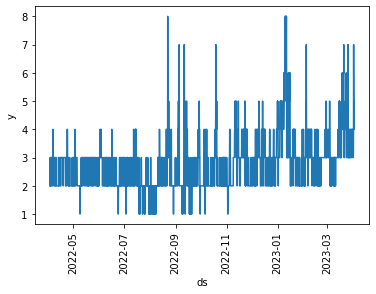

In [55]:
df3.rename(columns={"Date": "ds", "Edmonton": "y"}, inplace=True)
df3['ds'] = df3['ds'].dt.tz_localize(None)
df3.head()
plt.xticks(rotation=90)
sns.lineplot(x=df3.ds, y=df3["y"])

20:42:29 - cmdstanpy - INFO - Chain [1] start processing
20:42:33 - cmdstanpy - INFO - Chain [1] done processing


MAPE:  0.16918100350241053
MSPE:  0.050839650553306956
MSE :  0.5856915340994078


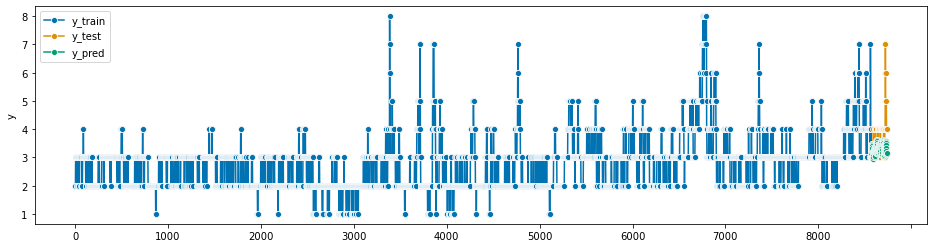

In [56]:
# Convert index to pd.DatetimeIndex
train, test = temporal_train_test_split(df3, test_size=24*7)

AQI3 = fbProphet(daily_seasonality=True)
#AQIprophet.add_regressor('Open')

AQI3.add_country_holidays(country_name="Canada")
AQI3.add_seasonality(name="weekly", fourier_order=15, period=7)


#AQIprophet.add_regressor("Volume")
#AQIprophet.add_regressor("Dividends")
#AQIprophet.add_regressor("Stock Splits")

AQI3.fit(train)
preds = AQI3.predict(test)
preds.index = test.index
#preds

plot_series(train["y"], test["y"], preds["yhat"], labels=["y_train", "y_test", "y_pred"])
print("MAPE: ", mean_absolute_percentage_error(preds["yhat"], test["y"]))
print("MSPE: ", mean_squared_percentage_error(preds["yhat"], test["y"]))
print("MSE : ", mean_squared_error(preds["yhat"], test["y"]))

The Mean Absolute Percentage Error (MAPE) score of 0.169 suggests that the FB Prophet model's forecasted values differ from the actual values by an average of 16.9%.

The Mean Squared Percentage Error (MSPE) of 0.0508 indicates that the model's predictions are less variable than the actual values by 5.08%.

The Mean Squared Error (MSE) score of 0.586 suggests that the model's predicted values deviate from the actual values, on average, by 0.586 units.

Overall, the relatively low MAPE and MSPE scores indicate that the model has performed well in accurately predicting future values.

For this project, we created a dataframe that included the dates we wanted to predict the AQI.

In [57]:
start_date = pd.Timestamp('2023-04-15')
end_date = pd.Timestamp('2023-04-30')

In [58]:
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
future_df2 = pd.DataFrame({'ds': future_dates})
future_df2['ds']=future_df2['ds'].astype('datetime64[ns]')
future_df2['ds'] = future_df2['ds'].dt.tz_localize(None)
future_df2

,ds
0,2023-04-15
1,2023-04-16
2,2023-04-17
3,2023-04-18
4,2023-04-19
5,2023-04-20
6,2023-04-21
7,2023-04-22
8,2023-04-23
9,2023-04-24


In [59]:
future_preds = AQI3.predict(future_df2)

In [60]:
future_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ds                               16 non-null     datetime64[ns]
 1   trend                            16 non-null     float64       
 2   yhat_lower                       16 non-null     float64       
 3   yhat_upper                       16 non-null     float64       
 4   trend_lower                      16 non-null     float64       
 5   trend_upper                      16 non-null     float64       
 6   Boxing Day                       16 non-null     float64       
 7   Boxing Day_lower                 16 non-null     float64       
 8   Boxing Day_upper                 16 non-null     float64       
 9   Canada Day                       16 non-null     float64       
 10  Canada Day_lower                 16 non-null     float64       


In [61]:
dff = future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [62]:
dff

,ds,yhat,yhat_lower,yhat_upper
0,2023-04-15,3.446572,2.409196,4.425832
1,2023-04-16,3.604322,2.537270,4.564181
2,2023-04-17,3.333905,2.183439,4.353513
3,2023-04-18,3.374618,2.349613,4.477896
4,2023-04-19,3.526911,2.416732,4.550557
5,2023-04-20,3.379927,2.352295,4.402391
6,2023-04-21,3.437388,2.469924,4.462222
7,2023-04-22,3.449398,2.469138,4.415283
8,2023-04-23,3.607148,2.607376,4.696395
9,2023-04-24,3.336731,2.276232,4.314397


In [63]:
dff.to_csv('AQI_daily_predictions.csv', index=False)

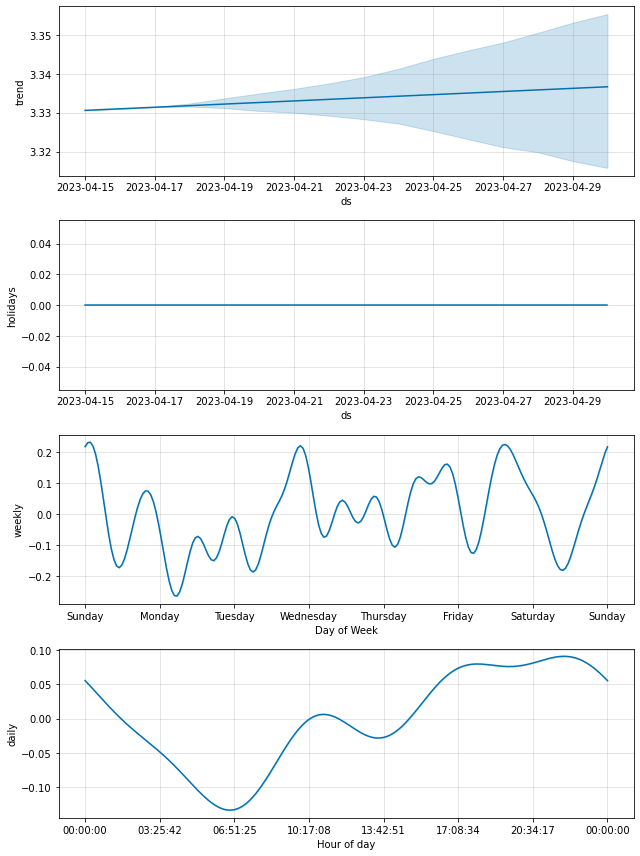

In [64]:
fig = AQI3.plot_components(future_preds)

Creating a data for hourly predictions.

In [65]:
future_dates2 = pd.date_range(start=start_date, end=end_date, freq='H')
future_df3 = pd.DataFrame({'ds': future_dates2})
future_df3['ds']=future_df3['ds'].astype('datetime64[ns]')
future_df3['ds'] = future_df3['ds'].dt.tz_localize(None)
future_df3

,ds
0,2023-04-15 00:00:00
1,2023-04-15 01:00:00
2,2023-04-15 02:00:00
3,2023-04-15 03:00:00
4,2023-04-15 04:00:00
...,...
356,2023-04-29 20:00:00
357,2023-04-29 21:00:00
358,2023-04-29 22:00:00
359,2023-04-29 23:00:00


In [66]:
future_preds2 = AQI3.predict(future_df3)

In [67]:
dff2 = future_preds2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [68]:
dff2

,ds,yhat,yhat_lower,yhat_upper
0,2023-04-15 00:00:00,3.446572,2.488079,4.466182
1,2023-04-15 01:00:00,3.393520,2.338512,4.414334
2,2023-04-15 02:00:00,3.339953,2.318235,4.320115
3,2023-04-15 03:00:00,3.286231,2.235102,4.330247
4,2023-04-15 04:00:00,3.225630,2.175383,4.265447
...,...,...,...,...
356,2023-04-29 20:00:00,3.508153,2.561326,4.512569
357,2023-04-29 21:00:00,3.547377,2.522563,4.544436
358,2023-04-29 22:00:00,3.586744,2.565990,4.632457
359,2023-04-29 23:00:00,3.610183,2.543321,4.618680


In [69]:
dff2.to_csv('AQI_hourly_predictions.csv', index=False)

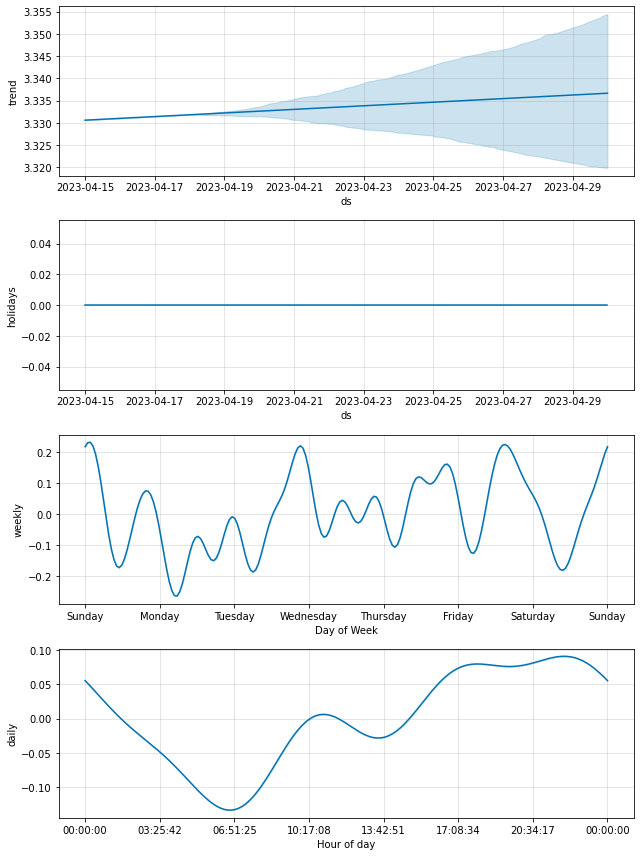

In [70]:
fig2 = AQI3.plot_components(future_preds2)

Evaluating the performance of the FB Prophet Model.

In [71]:
from prophet.diagnostics import cross_validation
AQI3 = fbProphet(daily_seasonality=True)
AQI3.add_country_holidays(country_name="Canada")
AQI3.add_seasonality(name="weekly", fourier_order=5, period=4)

AQI3.fit(df3)

df_cv = cross_validation(AQI3, initial='300 days', period='180 days', horizon = '60 days')
df_cv.head()

20:44:05 - cmdstanpy - INFO - Chain [1] start processing
20:44:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

20:44:15 - cmdstanpy - INFO - Chain [1] start processing
20:44:21 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-01 11:00:00,3.298149,2.236279,4.250350,2.0,2023-02-01 10:00:00
1,2023-02-01 12:00:00,3.321097,2.248999,4.365201,2.0,2023-02-01 10:00:00
2,2023-02-01 13:00:00,3.331572,2.306013,4.458864,2.0,2023-02-01 10:00:00
3,2023-02-01 14:00:00,3.354461,2.292257,4.402209,2.0,2023-02-01 10:00:00
4,2023-02-01 15:00:00,3.400105,2.363735,4.466405,2.0,2023-02-01 10:00:00


In [72]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days 23:00:00,1.099101,1.048380,0.857182,0.311206,0.191949,0.266502,0.636364
1,6 days 00:00:00,1.088202,1.043169,0.850592,0.307496,0.189464,0.263858,0.643357
2,6 days 01:00:00,1.077210,1.037887,0.844266,0.303848,0.188623,0.261294,0.650350
3,6 days 02:00:00,1.066206,1.032572,0.838078,0.300233,0.187591,0.258770,0.657343
4,6 days 03:00:00,1.054878,1.027072,0.831846,0.296577,0.185874,0.256234,0.664336


In [73]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days 23:00:00,1.099101,1.048380,0.857182,0.311206,0.191949,0.266502,0.636364
1,6 days 00:00:00,1.088202,1.043169,0.850592,0.307496,0.189464,0.263858,0.643357
2,6 days 01:00:00,1.077210,1.037887,0.844266,0.303848,0.188623,0.261294,0.650350
3,6 days 02:00:00,1.066206,1.032572,0.838078,0.300233,0.187591,0.258770,0.657343
4,6 days 03:00:00,1.054878,1.027072,0.831846,0.296577,0.185874,0.256234,0.664336
...,...,...,...,...,...,...,...,...
1292,59 days 20:00:00,0.620337,0.787615,0.625142,0.175516,0.192481,0.167959,0.916084
1293,59 days 21:00:00,0.620942,0.787999,0.625719,0.175378,0.192481,0.167981,0.916084
1294,59 days 22:00:00,0.620787,0.787900,0.625577,0.175018,0.192481,0.167799,0.916084
1295,59 days 23:00:00,0.621442,0.788316,0.626364,0.175215,0.192481,0.168018,0.916084


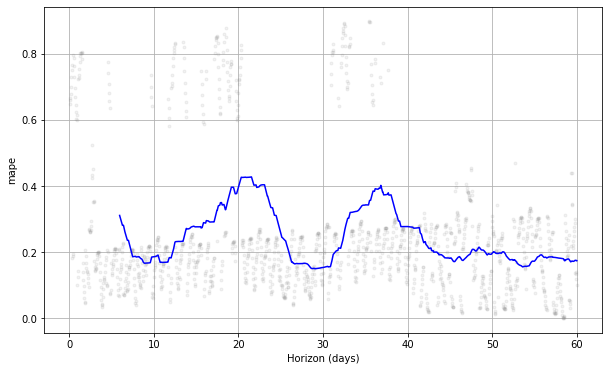

In [75]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')